In [2]:
import yfinance as yf

msft = yf.Ticker('MSFT')
msft_hist = msft.history(period='max')

In [3]:
msft_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.0,0.0


<Axes: xlabel='Date'>

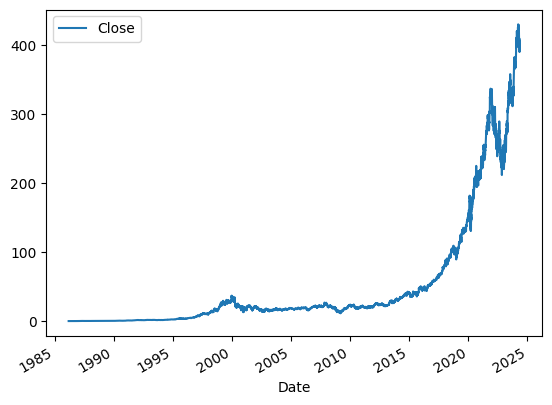

In [4]:
msft_hist.plot.line(y='Close', use_index=True)

In [5]:
data = msft_hist[['Close']]
data = data.rename(columns = {'Close':'Actual_Close'})
data['Target'] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']

In [6]:
data.head(5)

,Actual_Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060163,NaN
1986-03-14 00:00:00-05:00,0.062311,1.0
1986-03-17 00:00:00-05:00,0.063386,1.0
1986-03-18 00:00:00-05:00,0.061774,0.0
1986-03-19 00:00:00-05:00,0.060700,0.0


In [7]:
msft_prev = msft_hist.copy()

In [8]:
msft_prev = msft_prev.shift(1)

In [9]:
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,6.776640e+07,0.0,0.0


In [10]:
predictors = ['Close', 'High', 'Low', 'Open', 'Volume']
data = data.join(msft_prev[predictors]).iloc[1:]

In [11]:
data.head(5)

,Actual_Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062311,1.0,0.060163,0.062849,0.054792,0.054792,1.031789e+09
1986-03-17 00:00:00-05:00,0.063386,1.0,0.062311,0.063386,0.060163,0.060163,3.081600e+08
1986-03-18 00:00:00-05:00,0.061774,0.0,0.063386,0.063923,0.062311,0.062311,1.331712e+08
1986-03-19 00:00:00-05:00,0.060700,0.0,0.061774,0.063923,0.061237,0.063386,6.776640e+07
1986-03-20 00:00:00-05:00,0.059089,0.0,0.060700,0.062311,0.060163,0.061774,4.789440e+07


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train['Target'])

,Actual_Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
2023-12-08 00:00:00-05:00,373.539246,1.0,370.265289,370.764366,365.643831,367.550309,23118900.0
2023-12-11 00:00:00-05:00,370.614624,0.0,373.539246,373.768802,367.550321,368.518531,20144800.0
2023-12-12 00:00:00-05:00,373.688965,1.0,370.614624,370.914089,365.424241,367.799852,27708800.0
2023-12-13 00:00:00-05:00,373.678955,0.0,373.688965,373.728900,369.776187,370.165482,24838300.0
2023-12-14 00:00:00-05:00,365.254547,0.0,373.678955,376.942939,370.085594,375.325903,30955500.0
...,...,...,...,...,...,...,...
2024-04-26 00:00:00-04:00,406.320007,1.0,399.040009,399.890015,388.029999,394.029999,40586500.0
2024-04-29 00:00:00-04:00,402.250000,0.0,406.320007,413.000000,405.760010,412.170013,29694700.0
2024-04-30 00:00:00-04:00,389.329987,0.0,402.250000,406.320007,399.190002,405.250000,19582100.0


In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.])

In [15]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [16]:
preds

Date
2023-12-08 00:00:00-05:00    1.0
2023-12-11 00:00:00-05:00    1.0
2023-12-12 00:00:00-05:00    1.0
2023-12-13 00:00:00-05:00    1.0
2023-12-14 00:00:00-05:00    1.0
                            ... 
2024-04-26 00:00:00-04:00    0.0
2024-04-29 00:00:00-04:00    0.0
2024-04-30 00:00:00-04:00    0.0
2024-05-01 00:00:00-04:00    1.0
2024-05-02 00:00:00-04:00    1.0
Length: 100, dtype: float64

In [18]:
precision_score(test['Target'], preds)

0.5373134328358209

In [19]:
combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis=1)
combined

,Target,Predictions
Date,,
2023-12-08 00:00:00-05:00,1.0,1.0
2023-12-11 00:00:00-05:00,0.0,1.0
2023-12-12 00:00:00-05:00,1.0,1.0
2023-12-13 00:00:00-05:00,0.0,1.0
2023-12-14 00:00:00-05:00,0.0,1.0
...,...,...
2024-04-26 00:00:00-04:00,1.0,0.0
2024-04-29 00:00:00-04:00,0.0,0.0
2024-04-30 00:00:00-04:00,0.0,0.0


<Axes: xlabel='Date'>

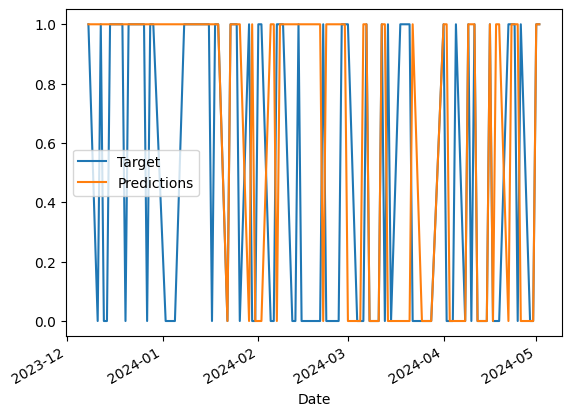

In [20]:
combined.plot()

In [41]:
start = 1000
step = 750
def backtest(data, model, predictors, start = 1000, step = 750):
    predictions = []
    for i in range(start, data.shape[0], step):

        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        model.fit(train[predictors], train['Target'])

        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds <= .6] = 0

        combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis=1)

        predictions.append(combined)
        
    predictions = pd.concat(predictions)
    return predictions

In [37]:
predictions['Predictions'].value_counts()

Predictions
0.0    7947
1.0     664
Name: count, dtype: int64

In [40]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5

In [42]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()['Target']

In [44]:
data['weekly_mean'] = weekly_mean['Close'] / data['Close']
data['quarterly_mean'] = quarterly_mean['Close'] / data['Close']
data['annual_mean'] = annual_mean['Close'] / data['Close']

data['annual_weekly_mean'] = data['annual_mean'] / data['weekly_mean']
data['annual_quarterly_mean'] = data['annual_mean'] / data['quarterly_mean']
data['weekly_trend'] = weekly_trend

data['open_close_ratio'] = data['Open'] / data['Close']
data['high_close_ratio'] = data['High'] / data['Close']
data['low_close_ratio'] = data['Low'] / data['Close']
full_predictiors = predictors + ['weekly_mean', 'quarterly_mean', 'annual_mean', 'annual_weekly_mean', 'annual_quarterly_mean', 'open_close_ratio', 'low_close_ratio', 'weekly_trend']


In [45]:
predictions = backtest(data.iloc[365:], model, full_predictiors)

In [46]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5615141955835962

In [47]:
predictions['Predictions'].value_counts()

Predictions
0.0    7929
1.0     317
Name: count, dtype: int64